In [1]:
%matplotlib inline

# Imports

In [2]:
import joblib
import pandas as pd
import glob

import numpy as np
from matplotlib import pyplot as plt

# Read in / process data

In [5]:
###Load classifier model
clf = joblib.load('../../Data/rf_highMinAJH.joblib')

###Load datasets
train_df = pd.read_csv('../../Data/train_df.csv', index_col=0)
print(train_df.shape)
test_df = pd.read_csv('../../Data/test_df.csv', index_col=0)
print(test_df.shape)

(634, 229)
(423, 229)


**Integrate my predictions into dataframe**

In [29]:
test_df.iloc[0][test_df.columns[23:-2]]

COG0582       0
COG0675       0
COG1475       0
COG1662       0
COG1961       0
             ..
pfam18763     0
pfam18803     0
pfam18804     0
pfam18866     0
smart00674    0
Name: 514, Length: 206, dtype: object

In [30]:
listy = clf.predict_proba(test_df[test_df.columns[23:-2]])

In [32]:
listy[0][0]

0.021052631578947368

In [6]:
train_df['my_predictions'] = clf.predict(train_df[train_df.columns[23:]])
test_df['my_predictions'] = clf.predict(test_df[test_df.columns[23:]])

In [7]:
train_df['my_predictions'] = train_df['my_predictions'].replace(1, 'yes')
train_df['my_predictions'] = train_df['my_predictions'].replace(0, 'no')

test_df['my_predictions'] = test_df['my_predictions'].replace(1, 'yes')
test_df['my_predictions'] = test_df['my_predictions'].replace(0, 'no')

**Integrate PHACTS predictions into dataframe**

In [8]:
listy = []
for index in train_df.index[:]:
    name = train_df.loc[index]['Identifier_AJH']
#     phacts_out = '../../Data/model_data/phage_data_nmicro2017/PHACTS_results/{}_6frame.out'.format(name)
#     name2 = phacts_out.split('/')[-1].split('_6frame.out')[0]
    phacts_out = '../../Data/model_data/phage_data_nmicro2017/PHACTS_results/{}_prodigal.out'.format(name)
    name2 = phacts_out.split('/')[-1].split('_prodigal.out')[0]
    assert name == name2
    phacts_df = pd.read_csv(phacts_out, sep='\t', skiprows=3, header=None)
    assert phacts_df.iloc[0][1] >= phacts_df.iloc[1][1]
    if phacts_df.iloc[0][1] == phacts_df.iloc[1][1]:
        listy.append('-')
        continue
    if phacts_df.iloc[0][0] == 'Temperate':
        listy.append('yes')
    else:
        listy.append('no')
train_df['Temperate_PHACTS'] = listy

In [9]:
listy = []
for index in test_df.index[:]:
    name = test_df.loc[index]['Identifier_AJH']
#     phacts_out = '../../Data/model_data/phage_data_nmicro2017/PHACTS_results/{}_6frame.out'.format(name)
#     name2 = phacts_out.split('/')[-1].split('_6frame.out')[0]
    phacts_out = '../../Data/model_data/phage_data_nmicro2017/PHACTS_results/{}_prodigal.out'.format(name)
    name2 = phacts_out.split('/')[-1].split('_prodigal.out')[0]
    assert name == name2
    phacts_df = pd.read_csv(phacts_out, sep='\t', skiprows=3, header=None)
    assert phacts_df.iloc[0][1] >= phacts_df.iloc[1][1]
    if phacts_df.iloc[0][1] == phacts_df.iloc[1][1]:
        listy.append('-')
        continue
    if phacts_df.iloc[0][0] == 'Temperate':
        listy.append('yes')
    else:
        listy.append('no')
test_df['Temperate_PHACTS'] = listy

# Assess accuracies

In [10]:
print('Out of a starting shape of: {}'.format(train_df.shape))

print(train_df[train_df['Temperate (empirical)'] != 
               train_df['Temperate (bioinformatically predicted)']].shape)

print(train_df[train_df['Temperate (empirical)'] != 
               train_df['my_predictions']].shape)


print(train_df[train_df['Temperate (empirical)'] != 
               train_df['Temperate_PHACTS']].shape)

Out of a starting shape of: (634, 231)
(24, 231)
(1, 231)
(120, 231)


In [11]:
print('Out of a starting shape of: {}'.format(test_df.shape))

print(test_df[test_df['Temperate (empirical)'] != 
               test_df['Temperate (bioinformatically predicted)']].shape)

print(test_df[test_df['Temperate (empirical)'] != 
               test_df['my_predictions']].shape)

print(test_df[test_df['Temperate (empirical)'] != 
               test_df['Temperate_PHACTS']].shape)

Out of a starting shape of: (423, 231)
(19, 231)
(8, 231)
(89, 231)


# Plot

In [12]:
my_train_errors = train_df[train_df['Temperate (empirical)'] != 
                           train_df['my_predictions']].shape[0] /\
                            train_df.shape[0] * 100.

other_train_errors = train_df[train_df['Temperate (empirical)'] != 
                           train_df['Temperate (bioinformatically predicted)']].shape[0] /\
                            train_df.shape[0] * 100.

phacts_train_errors = train_df[train_df['Temperate (empirical)'] != 
                           train_df['Temperate_PHACTS']].shape[0] /\
                            train_df.shape[0] * 100.
print(my_train_errors, other_train_errors, phacts_train_errors)

0.15772870662460567 3.7854889589905363 18.92744479495268


In [13]:
my_test_errors = test_df[test_df['Temperate (empirical)'] != 
                           test_df['my_predictions']].shape[0] /\
                            test_df.shape[0] * 100.

other_test_errors = test_df[test_df['Temperate (empirical)'] != 
                           test_df['Temperate (bioinformatically predicted)']].shape[0] /\
                            test_df.shape[0] * 100.

phacts_test_errors = test_df[test_df['Temperate (empirical)'] != 
                           test_df['Temperate_PHACTS']].shape[0] /\
                            test_df.shape[0] * 100.

print(my_test_errors, other_test_errors, phacts_test_errors)

1.8912529550827424 4.491725768321513 21.04018912529551


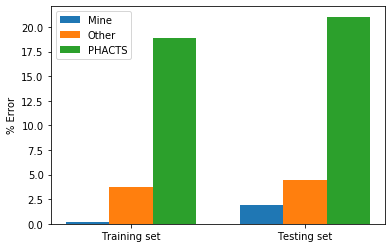

In [14]:
N = 2
my_errs = [my_train_errors, my_test_errors]
other_errs = [other_train_errors, other_test_errors]
phacts_errs = [phacts_train_errors, phacts_test_errors]

fig, ax = plt.subplots()
ind = np.arange(N)    # the x locations for the groups
width = 0.25         # the width of the bars
p1 = ax.bar(ind, my_errs, width)
p2 = ax.bar(ind+width, other_errs, width)
p3 = ax.bar(ind+width+width, phacts_errs, width)


ax.set_xticks([0.25, 1.25])
ax.set_xticklabels(['Training set', 'Testing set'])

ax.legend((p1[0], p2[0], p3[0]), ('Mine', 'Other', 'PHACTS'))
ax.set_ylabel('% Error');

# A more challenging test set

In [15]:
import json
with open('../../Data/model_data/clusters.json', 'r') as infile:
    clusters = json.load(infile)

In [18]:
temp_names = list(train_df['Identifier_AJH'])

independent_set = []
for cluster in clusters:
    hits = []
    for member in cluster:
        if member in temp_names:
            hits.append(member)
    if len(hits) == 0:
        independent_set.extend(cluster)
        
###Get the challenging set        
temp_df = test_df[test_df['Identifier_AJH'].isin(independent_set)]
print(temp_df.shape)

(172, 231)


In [19]:
my_temp_errors = temp_df[temp_df['Temperate (empirical)'] != 
                           temp_df['my_predictions']].shape[0] /\
                            temp_df.shape[0] * 100.

other_temp_errors = temp_df[temp_df['Temperate (empirical)'] != 
                           temp_df['Temperate (bioinformatically predicted)']].shape[0] /\
                            temp_df.shape[0] * 100.

phacts_temp_errors = temp_df[temp_df['Temperate (empirical)'] != 
                           temp_df['Temperate_PHACTS']].shape[0] /\
                            temp_df.shape[0] * 100.

print(my_temp_errors, other_temp_errors, phacts_temp_errors)

3.488372093023256 6.976744186046512 18.023255813953487


In [ ]:
train_df[train_df['Temperate (empirical)'] != 
               train_df['Temperate (bioinformatically predicted)']][['Temperate (empirical)',\
                                           'Temperate (bioinformatically predicted)',\
                                           'my_predictions',\
                                           'Temperate_PHACTS']]

In [ ]:
print('Correct:', train_df[(train_df['Temperate (empirical)']=='yes') & 
               (train_df['Temperate_PHACTS']=='yes')].shape[0])

print('Error:', train_df[(train_df['Temperate (empirical)']=='no') & 
               (train_df['Temperate_PHACTS']=='yes')].shape[0])

print('Correct:', train_df[(train_df['Temperate (empirical)']=='no') & 
               (train_df['Temperate_PHACTS']=='no')].shape[0])

print('Error:', train_df[(train_df['Temperate (empirical)']=='yes') & 
               (train_df['Temperate_PHACTS']=='no')].shape[0])

In [ ]:
print('Correct:', test_df[(test_df['Temperate (empirical)']=='yes') & 
               (test_df['Temperate_PHACTS']=='yes')].shape[0])

print('Error:', test_df[(test_df['Temperate (empirical)']=='no') & 
               (test_df['Temperate_PHACTS']=='yes')].shape[0])

print('Correct:', test_df[(test_df['Temperate (empirical)']=='no') & 
               (test_df['Temperate_PHACTS']=='no')].shape[0])

print('Error:', test_df[(test_df['Temperate (empirical)']=='yes') & 
               (test_df['Temperate_PHACTS']=='no')].shape[0])